# OCS Qubit Readout  Resonator

## To Do:

- [x] Create Metal GUI structure for resonator + transmission line 
- [ ] Scattering Simulation of the resonant structure
- [ ] Calculate $w_{res}$ from simulation

## To Set Up:

1. Parameter sweep of resonator to get required $w_{res} = w^{qubit}_{03}$

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from qiskit_metal import designs
from qiskit_metal import MetalGUI, Dict

design = designs.DesignPlanar()
gui = MetalGUI(design)

# CHIP SIZE
design._chips['main']['size']['size_x'] = '5mm'
design._chips['main']['size']['size_y'] = '5mm'

# CPW  PARAMETERS: NOT SURE
design.variables['cpw_width'] = '10 um'
design.variables['cpw_gap'] = '6 um'


D:\Users\lfl\Anaconda3\envs\qiskit-metal\lib\site-packages\pyproj\__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [3]:
# enable rebuild of the same component
design.overwrite_enabled = True

In [4]:
# for pins:
from qiskit_metal.qlibrary.terminations.open_to_ground import OpenToGround
# for routing:
from qiskit_metal.qlibrary.tlines.straight_path import RouteStraight
from qiskit_metal.qlibrary.tlines.framed_path import RouteFramed
# for jogs:
from collections import OrderedDict

In [5]:
from qiskit_metal.qlibrary.qubits.transmon_cross_fl import TransmonCrossFL
from qiskit_metal.qlibrary.qubits.transmon_cross import TransmonCross
from qiskit_metal.qlibrary.tlines.meandered import RouteMeander
from qiskit_metal.qlibrary.tlines.anchored_path import RouteAnchors
from qiskit_metal.qlibrary.tlines.pathfinder import RoutePathfinder
from qiskit_metal.qlibrary.terminations.open_to_ground import OpenToGround
from qiskit_metal.qlibrary.terminations.short_to_ground import ShortToGround
from qiskit_metal.qlibrary.terminations.launchpad_wb import LaunchpadWirebond
from qiskit_metal.qlibrary.terminations.launchpad_wb_coupled import LaunchpadWirebondCoupled

## Transmission Line

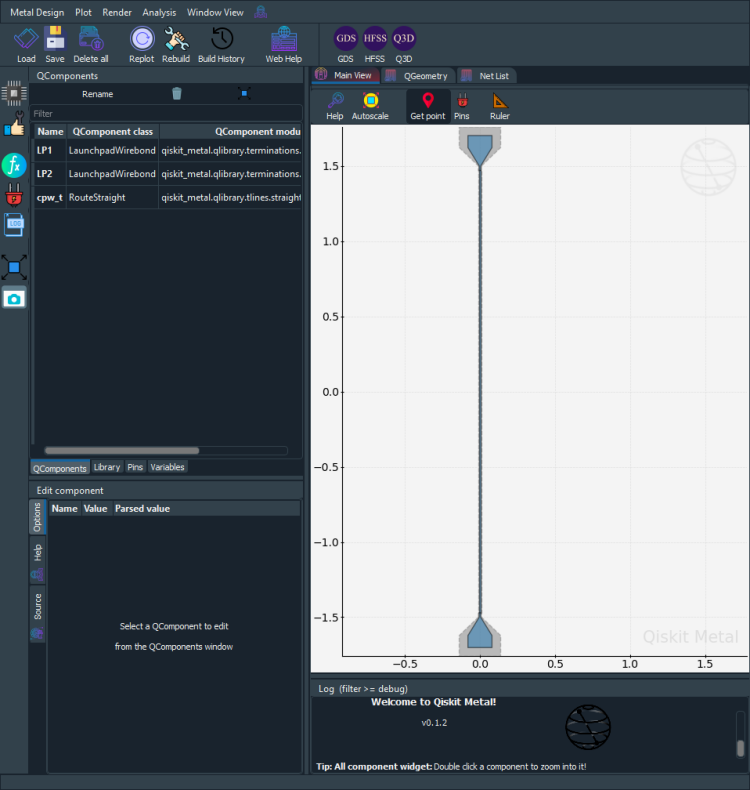

In [6]:
##### TRANSMISSION LINE ######
from qiskit_metal.qlibrary.tlines.straight_path import RouteStraight

lp_num_x_pos = '0um'

launch_options1 = dict(pos_x=lp_num_x_pos, 
                       pos_y= '1500um', 
                       orientation='-90', 
                       lead_length='30um', 
                       pad_width = '160um',
                       pad_length = '200um',
                       trace_width='cpw_width', 
                       trace_gap='cpw_gap')

launch_options2 = dict(pos_x=lp_num_x_pos, 
                       pos_y='-1500um', 
                       orientation='90', 
                       lead_length='30um', 
                       pad_width = '160um',
                       pad_length = '200um',
                       trace_width='cpw_width', 
                       trace_gap='cpw_gap')
options_t = Dict(
        lead=Dict(
            start_straight='0.35mm',
            end_straight='0.3mm'),
        trace_gap='cpw_gap',
        trace_width='cpw_width')

cpw_t_options = {'pin_inputs': {'start_pin': {'component': 'LP1', 'pin': 'tie'},
  'end_pin': {'component': 'LP2', 'pin': 'tie'}},
 'fillet': '0',
 'lead': {'start_straight': '0mm',
  'end_straight': '0mm',
  'start_jogged_extension': '',
  'end_jogged_extension': ''},
 'total_length': '7mm',
 'trace_width': 'cpw_width'}

lp1 = LaunchpadWirebond(design, 'LP1', options = launch_options1)
lp2 = LaunchpadWirebond(design, 'LP2', options = launch_options2)
cpw_t = RouteStraight(design, 'cpw_t', options=cpw_t_options)

gui.rebuild()
gui.autoscale()
gui.screenshot()

## Resonators

In [7]:
# lambda/4 resonators
def add_cpw(total_length = '4.0mm', 
            coupling_length = '180um', 
            finishing_length = '110um',
            pos_x_i = '-30um', 
            pos_y_i = '-1024um',
            pos_x_f = '-1120um', 
            pos_y_f = '-900um',
            index = 1,
            left = True
           ):
    if left:
        otg11 = OpenToGround(design, f'open1i_{index}', 
                             options=dict(width='10um',
                                          gap= '10um',
                                          pos_x=pos_x_i,  pos_y=pos_y_i, orientation='-90',
                                          termination_gap='0um'))
        otg12 = OpenToGround(design, f'open1o_{index}', 
                             options=dict(width='10um',
                                          gap= '10um',
                                          pos_x=pos_x_f,  pos_y=pos_y_f, orientation='180',
                                          termination_gap='0um'))
    else:
        otg11 = OpenToGround(design, f'open1i_{index}', 
                                          options=dict(width='10um',
                                          gap= '10um',
                                          pos_x=pos_x_i,  pos_y=pos_y_i, orientation='-90',termination_gap='0um'))
        otg12 = OpenToGround(design, f'open1o_{index}', 
                                          options=dict(width='10um',
                                          gap= '10um',
                                          pos_x=pos_x_f,  pos_y=pos_y_f, orientation='0',termination_gap='0um'))
    
    
    
    options = Dict(
        pin_inputs=Dict(
            start_pin=Dict(
                component=f'open1o_{index}',
                pin='open'),
            end_pin=Dict(
                component=f'open1i_{index}',
                pin='open')
            ),
            lead=Dict(
                    start_straight=coupling_length,
                    end_straight=finishing_length
            ),
            meander=Dict(
                  spacing = '78um',
                  asymmetry = '0um' #?
            ),
          total_length=total_length,
          trace_gap='6um', #?
          trace_width='10um', #?
          hfss_wire_bonds = False, #?
          fillet='38.5um'
        )


    cpw = RouteMeander(design, f'cpw_{index}', options=options)

    gui.rebuild()
    gui.autoscale()
    gui.screenshot()
    
    return cpw

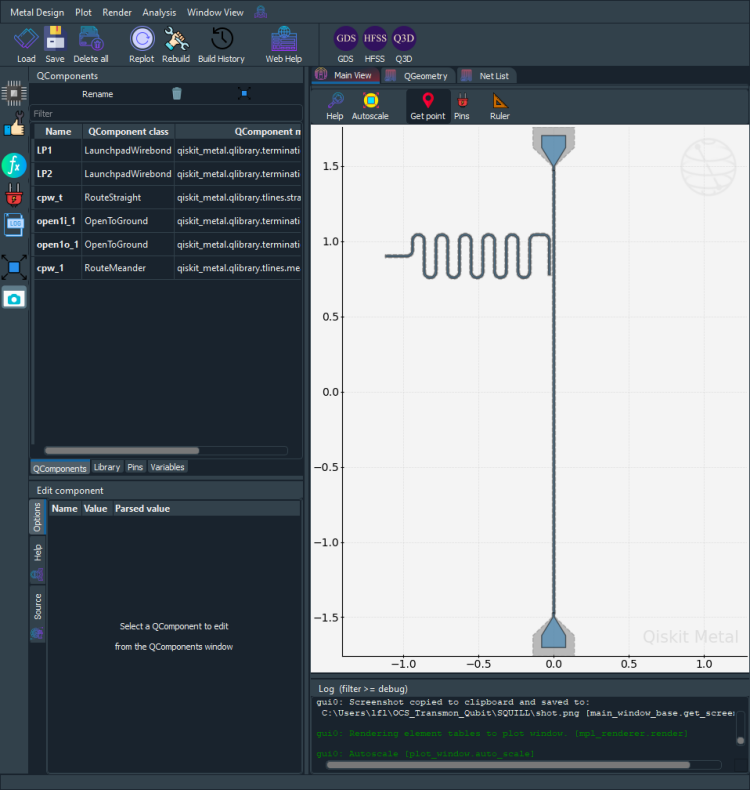

In [8]:
cpw1 = add_cpw(index=1,
                total_length = '3.975mm',
                pos_x_i = '-29um', 
                pos_y_i = '775um',
                pos_x_f = '-1119um', 
                pos_y_f = '900um',
              )

# OCS Qubit

In [ ]:
design.overwrite_enabled = True
def add_qubit(index,
                pos_x,
                pos_y,
                cross_width = '14um',
                cross_length = '70um',
                cross_gap = '30um',
                L_j = '10nH',
                claw_length = '150um',
                claw_width = '7um',
                claw_gap = '6um',
                left = True
                ):
    
    options_d = dict(
        pos_x = pos_x, 
        pos_y = pos_y, 
        orientation = 90 if left else 270,
        pin_orientation = -180 if left else 0,
        flux_orientation = -90 if left else 90,
        cross_width = cross_width,
        cross_length = cross_length,
        cross_gap = cross_gap,
        hfss_inductance = L_j,
        chip='main',

        connection_pads=dict(
        claw = dict(connector_location =  -180 if left else 0,
                 claw_length =  claw_length,
                 claw_width = claw_width,
                 claw_gap =  claw_gap,
                 ground_spacing = '10um'),
        )

    )

    q_diss = TransmonCrossFL(design, f'Q_{index}', options=options_d)
    gui.rebuild()
    gui.autoscale()
    gui.screenshot()
    
    return q_diss

In [ ]:
q1 = add_qubit(index=1, 
             pos_x=f'{-1420+179}um',
             pos_y= '900um',
            cross_width = '15um',
            cross_length = '90um',
            cross_gap = '32um',
)

# Simulation: Resonator EPR

<font color='red'>NEED HELP WIH OPEN TERMINATION ISSUE and PORT LIST.</font>

In [16]:
from qiskit_metal.analyses.quantization import EPRanalysis

eig_bus = EPRanalysis(design, "hfss")

eig_bus.sim.setup.max_passes = 18
eig_bus.sim.setup.max_delta_f = 0.005
eig_bus.sim.setup.n_modes = 1
resistance = 50 # R in signal path

eig_bus.sim.run(name='test_res2',
               components=['cpw_1'],
               #port_list =[("cpw_t","lead", resistance)], 
               #open_terminations=[('cpw_1','end'), ()],
               box_plus_buffer = True
               )
            



INFO 09:14PM [connect_design]: 	Opened active design
	Design:    test_res2_hfss [Solution type: Eigenmode]


TypeError: unsupported operand type(s) for +: 'NoneType' and 'list'

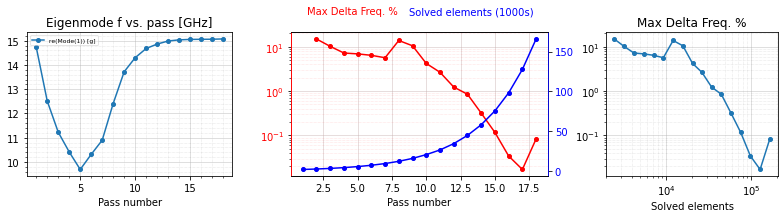

In [10]:
%matplotlib inline
eig_bus.sim.plot_convergences()

In [11]:
eig_bus.sim.convergence_f

,re(Mode(1)) [g]
Pass [],
1,14.726680
2,12.508647
3,11.226429
4,10.411972
5,9.690690
6,10.313949
7,10.898798
8,12.411888
9,13.721013


In [12]:
eig_bus.get_frequencies()

Design "test_res_hfss" info:
	# eigenmodes    1
	# variations    1
Design "test_res_hfss" info:
	# eigenmodes    1
	# variations    1


,,Freq. (GHz),Quality Factor
variation,mode,,
0,0,15.075504,inf


In [13]:
eig_bus.sim.setup

{'name': 'Setup',
 'reuse_selected_design': True,
 'reuse_setup': True,
 'min_freq_ghz': 1,
 'n_modes': 1,
 'max_delta_f': 0.005,
 'max_passes': 18,
 'min_passes': 1,
 'min_converged': 1,
 'pct_refinement': 30,
 'basis_order': 1,
 'vars': {'Lj': '10 nH', 'Cj': '0 fF'},
 'run': {'name': 'test_res',
  'components': ['cpw_1'],
  'open_terminations': None,
  'port_list': None,
  'jj_to_port': None,
  'ignored_jjs': None,
  'box_plus_buffer': True}}

# Simulation with effect of Transmission Line

**The following needs refactoring**

```python
from qiskit_metal.analyses.simulation import ScatteringImpedanceSim
from qiskit_metal.qlibrary.tlines.straight_path import RouteStraight
from qiskit_metal.qlibrary.terminations.launchpad_wb_driven import LaunchpadWirebondDriven

em1 = ScatteringImpedanceSim(design, "hfss")
# design_name= "RO+Q1"
# qcomp_render = [] # Means to render everything in qgeometry table.
# open_terminations = []

# Here, pin LP1_in and LP2_in are converted into lumped ports,
#           each with an impedance of 50 Ohms. 

# port_list = [('Left', 'in', 50), ('Right', 'in', 50), ('RO1', 'end', 50)]
# box_plus_buffer = True

# hfss = em1.renderer
# hfss.start()

# hfss.activate_ansys_design("HangingResonator1", 'drivenmodal')
# setup_args = Dict(max_delta_s=0.001)
# setup_args.name = 'Setup'
# hfss.edit_drivenmodal_setup(setup_args)

# hfss.options['x_buffer_width_mm'] = 0.1
# hfss.options['y_buffer_width_mm'] = 0.1
left_wb_options = dict(pos_x = '-2.025mm', 
                          pos_y ='0um', 
                          orientation = '0',
                          pad_width = '160um',
                          pad_length = '200um',
                          tapper_height = '200um')
obj=LaunchpadWirebondDriven(design,'left',options=left_wb_options)

right_wb_options = dict(pos_x = '2.025mm', 
                          pos_y ='0um', 
                          orientation = '180',
                          pad_width = '160um',
                          pad_length = '200um',
                          tapper_height = '200um')
obj=LaunchpadWirebondDriven(design,'right',options=right_wb_options)

feedline1 = RouteStraight(design, 'feedline1', Dict(
         pin_inputs=Dict(
             start_pin=Dict(component='left', pin='tie'),
             end_pin=Dict(component='right', pin='tie')),))

gui.rebuild()

hfss=em1.renderer
hfss.start()

hfss.activate_ansys_design("readout4", 'drivenmodal')
setup_args = Dict(max_delta_s=0.003, max_passes=20)
setup_args.name = 'Setup'
hfss.edit_drivenmodal_setup(setup_args)

hfss.options['x_buffer_width_mm'] = 0.5
hfss.options['y_buffer_width_mm'] = 0.5

hfss.clean_active_design()

hfss.render_design(selection=['readout4', 'q4_diss', 'q4_logical', 'feedline1', 'left', 'right'], 
                   open_pins=[], 
                   port_list=[('left', 'in', 50), ('right', 'in', 50)], 
                   jj_to_port=[], 
                   ignored_jjs=[('q4_diss', 'rect_jj'), ('q4_logical', 'rect_jj')],
                   box_plus_buffer = True)

hfss.modeler.mesh_length(
                'cpw_mesh',
                ['launch_pad_right', 'launch_pad_left', 'trace_feedline1', 'trace_readout4'],
                MaxLength='0.005mm')

hfss.add_sweep(setup_name="Setup", 
               name="Sweep", 
               start_ghz=6.9,
               stop_ghz=7.5,
               count=20001,
               type="Interpolating")#,
               #max_delta_s=0.003)

hfss.analyze_sweep('Sweep', 'Setup')



# hfss.analyze_sweep('Sweep', 'Setup')
# hfss.modeler.mesh_length('cpw_mesh', ['RO1'], MaxLength='0.1mm')

# em1.setup.max_passes = 70
# em1.setup.sweep_setup.start_ghz = 7.1
# em1.setup.sweep_setup.stop_ghz = 7.4
# em1.setup.sweep_setup.count = 20001
# em1.setup.sweep_setup.type = 'Fast'
# em1.setup.max_delta_s = 0.005

# #em1.setup_update(max_delta_s = 5e-4, freq_ghz = 7)

# em1.setup

# em1.run(name="Q1RO", components=['Q1', 'TL_left', 'TL_right', 'RO1', 'T1', 'Left', 'Right'], open_terminations=[], port_list=[('Left', 'in', 50), ('Right', 'in', 50), ('RO1', 'end', 50)], 
#         ignored_jjs=[('Q1', 'rect_jj')], box_plus_buffer = True)
```

# Profiling the Resonator:

In [ ]:
import matplotlib.pyplot as plt
import sys

sys.path.append('D:\\Users\\lfl\\Documents\\lflPython\\')

In [ ]:
from fitTools.Resonator import *

In [ ]:
dataframe_scattering = em1.get_scattering(['S22'])
dataframe_admittance = em1.get_scattering(['Y22'])

df_s = dataframe_scattering[0]
#df_y = dataframe_admittance[0]


def get_real_and_imag(a_ii):
    return a_ii.values.real, a_ii.values.imag

s11real, s11imag = get_real_and_imag(df_s['S22'])
#y11real, y11imag = get_real_and_imag(df_y['Y11'])


dataframe_scattering[0]['Real(S11)'] = s11real
dataframe_scattering[0]['Imag(S11)'] = s11imag
#dataframe_admittance[0]['Real(Y11)'] = y11real
#dataframe_admittance[0]['Imag(Y11)'] = y11imag

In [ ]:
# Reference to current axis.
magnitude = plt.figure('Real S11, Imag S11')
axis = plt.gca() # Get current axis.
dataframe_scattering[0].plot(kind = 'line', y='Real(S11)', color = 'green', ax = axis)
#dataframe_scattering[0].plot(kind = 'line', y='Imag(S11)', color = 'blue', ax = axis)
plt.title(f'S-Parameter Amplitude')
plt.xlabel(f'frequency [GHZ]')
plt.ylabel(f're(S11), im(S11) Amp')
magnitude.show()

In [ ]:
reals11 = dataframe_scattering[0]['Real(S11)']
imags11 = dataframe_scattering[0]['Imag(S11)']
freqs = np.array(list(reals11.keys())) * 1e9
I = np.array(list(reals11.values))
Q = np.array(list(imags11.values))

In [ ]:
res = Resonator(f_data=freqs,z_data=I + 1j*Q)

In [ ]:
res.autofit()

In [ ]:
res.show()